In [ ]:
# link to dataset:https://data.world/data-society/pima-indians-diabetes-database

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
df=pd.read_csv("c:/users/demongking28/downloads/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#Performing normalization of data
columns_norm=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']
df[columns_norm]=df[columns_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [7]:
#after normalisation
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [8]:
#tf estimator step 1:converting to feature columns

feature_1=tf.feature_column.numeric_column(key="Pregnancies")
feature_2=tf.feature_column.numeric_column(key="Glucose")
feature_3=tf.feature_column.numeric_column(key="BloodPressure")
feature_4=tf.feature_column.numeric_column(key="SkinThickness")
feature_5=tf.feature_column.numeric_column(key="Insulin")
feature_6=tf.feature_column.numeric_column(key="BMI")
feature_7=tf.feature_column.numeric_column(key="DiabetesPedigreeFunction")
feature_8=tf.feature_column.numeric_column(key="Age")

In [9]:
# how to treat categorical column if you have
#so lets first create a feature column for category

total_size=len(df['Age'])
array=[]

for i in range(total_size):
    array.append(random.choice(["Ex","A+","A","B+","B","C","D","F","F*"]))

dff=pd.DataFrame()
dff["categorical"]=array

In [10]:
df=pd.concat([df,dff],axis=1)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,categorical
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,D
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,B
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,A+
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,Ex
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,D


In [12]:
#Either use vocabulary_list or use hash buckets
feature_9=tf.feature_column.categorical_column_with_vocabulary_list(key="categorical",vocabulary_list=["Ex","A+","A","B+","B","C","D","F","F*"])

In [13]:
feature_10=tf.feature_column.categorical_column_with_hash_bucket(key="categorical",hash_bucket_size=10)#max diff value you expect in a category

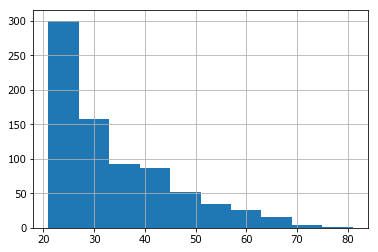

In [14]:
#Since age will be better treated as a categorical vale we first visualize the ages present 
df['Age'].hist(bins=10)

In [15]:
#now converting into feature columns

age_convert=tf.feature_column.bucketized_column(feature_8,boundaries=[20,30,40,50,60,70,80])

In [16]:
#Now passing whole feature columns to tf estimator as a list


feature_columns=[feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,age_convert]

#step1 completed

In [17]:
x_data=df.drop('Outcome',axis=1)
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,categorical
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,D
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,B
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,A+
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,Ex
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,D


In [18]:
y_data=df['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
#split data to train,test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [20]:
#step 2 Initialize the input functions
train_input=tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=16,num_epochs=1000,shuffle=True)
test_input=tf.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=16,num_epochs=1,shuffle=False)

In [21]:
#Initialize the model
model=tf.estimator.LinearClassifier(feature_columns=feature_columns,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DEMONG~1\\AppData\\Local\\Temp\\tmpsmmsjkgp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018A269A9D68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
#start training
model.train(input_fn=train_input,steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\DEMONG~1\AppData\Local\Temp\tmpsmmsjkgp\model.ckpt.
INFO:tensorflow:loss = 11.090355, step = 1
INFO:tensorflow:global_step/sec: 157.542
INFO:tensorflow:loss = 9.63912, step = 101 (0.643 sec)
INFO:tensorflow:global_step/sec: 369.447
INFO:tensorflow:loss = 6.9340773, step = 201 (0.263 sec)
INFO:tensorflow:global_step/sec: 339.738
INFO:tensorflow:loss = 9.645036, step = 301 (0.299 sec)
INFO:tensorflow:global_step/sec: 326.117
INFO:tensorflow:loss = 7.6308384, step = 401 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.138
INFO:tensorflow:loss = 7.2937574, step = 501 (0.312 sec)
INFO:tensorflow:global_step/sec: 333.788
INFO:tensorflow:loss = 7.4304667, step = 601 (0.300 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 332.532
INFO:tensorflow:loss = 8.70788, step = 8101 (0.301 sec)
INFO:tensorflow:global_step/sec: 327.396
INFO:tensorflow:loss = 6.638569, step = 8201 (0.311 sec)
INFO:tensorflow:global_step/sec: 320.436
INFO:tensorflow:loss = 8.343174, step = 8301 (0.306 sec)
INFO:tensorflow:global_step/sec: 348.234
INFO:tensorflow:loss = 4.6283627, step = 8401 (0.293 sec)
INFO:tensorflow:global_step/sec: 322.091
INFO:tensorflow:loss = 4.7618685, step = 8501 (0.303 sec)
INFO:tensorflow:global_step/sec: 331.15
INFO:tensorflow:loss = 8.427107, step = 8601 (0.304 sec)
INFO:tensorflow:global_step/sec: 325.791
INFO:tensorflow:loss = 8.903787, step = 8701 (0.311 sec)
INFO:tensorflow:global_step/sec: 330.208
INFO:tensorflow:loss = 6.4354987, step = 8801 (0.299 sec)
INFO:tensorflow:global_step/sec: 327.681
INFO:tensorflow:loss = 8.424213, step = 8901 (0.305 sec)
INFO:tensorflow:global_step/sec: 333.103
INFO:tensorflow:loss = 6.340296, step = 9001 (0.295 sec)
INFO:tensorflow:glo

INFO:tensorflow:global_step/sec: 321.322
INFO:tensorflow:loss = 9.258322, step = 16401 (0.310 sec)
INFO:tensorflow:global_step/sec: 314.578
INFO:tensorflow:loss = 11.317303, step = 16501 (0.319 sec)
INFO:tensorflow:global_step/sec: 326.488
INFO:tensorflow:loss = 11.753381, step = 16601 (0.311 sec)
INFO:tensorflow:global_step/sec: 307.8
INFO:tensorflow:loss = 5.9008846, step = 16701 (0.319 sec)
INFO:tensorflow:global_step/sec: 325.863
INFO:tensorflow:loss = 3.5526397, step = 16801 (0.307 sec)
INFO:tensorflow:global_step/sec: 310.857
INFO:tensorflow:loss = 6.5729737, step = 16901 (0.318 sec)
INFO:tensorflow:global_step/sec: 316.528
INFO:tensorflow:loss = 7.0933237, step = 17001 (0.327 sec)
INFO:tensorflow:global_step/sec: 321.502
INFO:tensorflow:loss = 6.8061132, step = 17101 (0.308 sec)
INFO:tensorflow:global_step/sec: 307.122
INFO:tensorflow:loss = 3.3592508, step = 17201 (0.327 sec)
INFO:tensorflow:global_step/sec: 322.031
INFO:tensorflow:loss = 9.145867, step = 17301 (0.305 sec)
INFO

In [23]:
results=model.evaluate(test_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-23-23:00:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEMONG~1\AppData\Local\Temp\tmpsmmsjkgp\model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-23-23:00:18
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.7748918, accuracy_baseline = 0.6536796, auc = 0.80947846, auc_precision_recall = 0.65176404, average_loss = 0.50578547, global_step = 20000, label/mean = 0.34632036, loss = 7.7890964, precision = 0.6944444, prediction/mean = 0.3566747, recall = 0.625


In [24]:
print(results)
print("\n")
print("Accuracy: ",results["accuracy"]*100)


{'accuracy': 0.7748918, 'accuracy_baseline': 0.6536796, 'auc': 0.80947846, 'auc_precision_recall': 0.65176404, 'average_loss': 0.50578547, 'label/mean': 0.34632036, 'loss': 7.7890964, 'precision': 0.6944444, 'prediction/mean': 0.3566747, 'recall': 0.625, 'global_step': 20000}


Accuracy:  77.48917937278748


In [25]:
#Now we will use dense Neural network as a model

#Initialize the model
model_nn=tf.estimator.DNNClassifier(hidden_units=[9,9,9,9,9,9,9],feature_columns=feature_columns,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DEMONG~1\\AppData\\Local\\Temp\\tmpeyur2kex', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018A299B52B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#start training

#do this you will get an error because we are passing categorical feature to a dense neural network
#first we will need to convert it into embeddings

model_nn.train(train_input,steps=15000)

In [26]:
new_feature=tf.feature_column.embedding_column(feature_9,9)

In [27]:
#look carefully now replaced feature_9 --> new_feature
feature_columns=[feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,new_feature,age_convert]

In [28]:
#lets re-difine input functions,shall we?
#No it is not required ,we only need to change feature columns


model_nn=tf.estimator.DNNClassifier(hidden_units=[9,9,9,9,9,9],feature_columns=feature_columns,n_classes=2)
model_nn.train(train_input,steps=15000)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DEMONG~1\\AppData\\Local\\Temp\\tmpl3lir212', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018A299B55F8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\DEMONG

INFO:tensorflow:loss = 3.3733387, step = 7201 (0.315 sec)
INFO:tensorflow:global_step/sec: 316.773
INFO:tensorflow:loss = 2.4849076, step = 7301 (0.321 sec)
INFO:tensorflow:global_step/sec: 338.697
INFO:tensorflow:loss = 4.00915, step = 7401 (0.285 sec)
INFO:tensorflow:global_step/sec: 338.515
INFO:tensorflow:loss = 0.9405178, step = 7501 (0.305 sec)
INFO:tensorflow:global_step/sec: 333.628
INFO:tensorflow:loss = 0.72050345, step = 7601 (0.295 sec)
INFO:tensorflow:global_step/sec: 338.461
INFO:tensorflow:loss = 1.3382818, step = 7701 (0.290 sec)
INFO:tensorflow:global_step/sec: 338.56
INFO:tensorflow:loss = 0.29390103, step = 7801 (0.300 sec)
INFO:tensorflow:global_step/sec: 338.559
INFO:tensorflow:loss = 2.460473, step = 7901 (0.295 sec)
INFO:tensorflow:global_step/sec: 333.752
INFO:tensorflow:loss = 1.9628705, step = 8001 (0.300 sec)
INFO:tensorflow:global_step/sec: 318.905
INFO:tensorflow:loss = 1.5175577, step = 8101 (0.313 sec)
INFO:tensorflow:global_step/sec: 252.258
INFO:tensorf

In [29]:
results_nn=model_nn.evaluate(test_input,steps=2)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-23-23:01:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEMONG~1\AppData\Local\Temp\tmpl3lir212\model.ckpt-15000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/2]
INFO:tensorflow:Evaluation [2/2]
INFO:tensorflow:Finished evaluation at 2018-06-23-23:01:30
INFO:tensorflow:Saving dict for global step 15000: accuracy = 0.6875, accuracy_baseline = 0.71875, auc = 0.6835749, auc_precision_recall = 0.42063764, average_loss = 1.9460614, global_step = 15000, label/mean = 0.28125, loss = 31.136982, precision = 0.46153846, prediction/mean = 0.36420134, recall = 0.6666667


In [30]:
results

{'accuracy': 0.7748918,
 'accuracy_baseline': 0.6536796,
 'auc': 0.80947846,
 'auc_precision_recall': 0.65176404,
 'average_loss': 0.50578547,
 'global_step': 20000,
 'label/mean': 0.34632036,
 'loss': 7.7890964,
 'precision': 0.6944444,
 'prediction/mean': 0.3566747,
 'recall': 0.625}

In [31]:
#remove that categoical feature column and you can see the improved results
